# **Random** **Forest**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import pandas as pd

df = pd.read_csv('/content/ipl_matches - ipl_matches.csv')

print(df.head())

print(df.info)

   id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hy

**Handle** **missing** **values**

**droping** **columns**

In [ ]:
df = df.drop(columns={'umpire3','city','id','venue'})

In [ ]:
print(df.shape)

(756, 14)


In [ ]:
df = df.fillna('Unknown')

In [ ]:
df.isnull().sum()

,0
Season,0
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0
winner,0
win_by_runs,0


Converting categorical features to numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save encoders for future use


In [ ]:
# Define features and target variable
target_column = 'winner'  # Change this if needed
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable


In [ ]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 604, Testing samples: 152


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples per leaf
    'criterion': ['gini', 'entropy']        # Splitting criterion
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=42), param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Optimized Model Accuracy: 0.83


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Model Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       0.50      0.43      0.46         7
           2       1.00      1.00      1.00         1
           3       0.71      0.56      0.62         9
           4       1.00      1.00      1.00         4
           5       0.83      0.88      0.86        17
           7       0.90      0.86      0.88        22
           8       0.69      0.95      0.80        19
           9       0.00      0.00      0.00         4
          10       0.92      0.79      0.85        14
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         3
          13       0.86      1.00      0.92        12
          14       0.85      0.92      0.88        12

    accuracy                           0.83       152
   macro avg       0.73      0.71      0.71       152
weighted avg       0.80      0.83      0.81       152



In [ ]:
# get OOB score (Out-of-Bag Score)
print("OOB Score of the Random Forest:", best_rf_model.oob_score)

# Classification Report
print(classification_report(y_test, y_pred))

OOB Score of the Random Forest: False
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       0.50      0.43      0.46         7
           2       1.00      1.00      1.00         1
           3       0.71      0.56      0.62         9
           4       1.00      1.00      1.00         4
           5       0.83      0.88      0.86        17
           7       0.90      0.86      0.88        22
           8       0.69      0.95      0.80        19
           9       0.00      0.00      0.00         4
          10       0.92      0.79      0.85        14
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         3
          13       0.86      1.00      0.92        12
          14       0.85      0.92      0.88        12

    accuracy                           0.83       152
   macro avg       0.73      0.71      0.71       152
weighted avg       0.80      0.83      0.8

In [ ]:
feature_importance = best_rf_model.feature_importances_

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

            Feature  Importance
3             team2    0.201635
2             team1    0.146117
4       toss_winner    0.142819
10  player_of_match    0.095140
8       win_by_runs    0.085993
9    win_by_wickets    0.065694
1              date    0.062626
0            Season    0.059796
11          umpire1    0.057036
12          umpire2    0.052636
5     toss_decision    0.021017
6            result    0.005082
7        dl_applied    0.004410


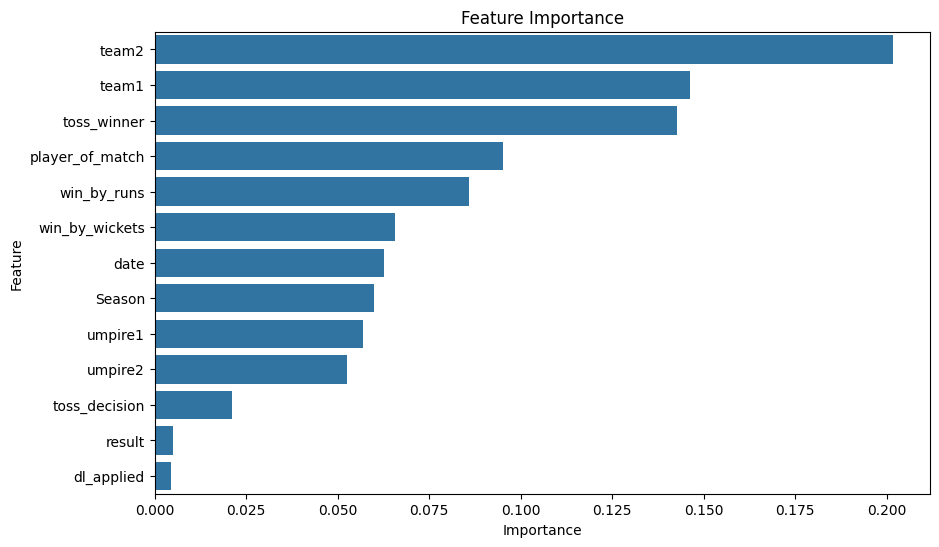

In [ ]:
# plot the feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()

## XGBoost Classifier

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

Load the dataset

In [ ]:
# Load dataset
df1 = pd.read_csv('/content/ipl_matches - ipl_matches.csv')

# View first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


   Season  date  team1  team2  toss_winner  toss_decision  result  dl_applied  \
0       9    59     14     13           13              1       1           0   
1       9    75      8     11           11              1       1           0   
2       9    90      4      7            7              1       1           0   
3       9   109     11      5            5              1       1           0   
4       9   109     13      3           13              0       1           0   

   winner  win_by_runs  win_by_wickets  player_of_match  umpire1  umpire2  
0      14           35               0              225        6       34  
1      11            0               7              199        1       49  
2       7            0              10               34       38       16  
3       5            0               6               61        3       14  
4      13           15               0               99       57       60  
Season             0
date               0
team1          

Dropping the columns not requried

In [ ]:
df1 = df1.drop(columns={'umpire3','city','venue','id','date'})

Handling missing values

In [ ]:
df1.fillna(method='ffill', inplace=True)

Convert categorical data to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col].astype(str))
    label_encoders[col] = le  # Save encoders for future use


Define feature and target

In [ ]:
target_column = 'winner'
x = df1.drop(columns=[target_column])
y = df1[target_column]

Split the data into training and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 604, Testing samples: 152


Train xgboost classifier"

In [ ]:
# Initialize XGBoost model
xgb_model = XGBClassifier()

# Train model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Predict on test set
y_pred = xgb_model.predict(X_test)

In [ ]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Model Accuracy: 0.94
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         1
           3       0.89      0.89      0.89         9
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        22
           8       0.82      0.95      0.88        19
           9       1.00      0.50      0.67         4
          10       0.93      0.93      0.93        14
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00        12
          14       0.86      1.00      0.92        12

    accuracy                           0.94       152
   macro avg       0.88      0.84      0.85       152
weighted avg       0.93      0.94      0.93       152



Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of boosting rounds
    'max_depth': [3, 5, 7],           # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'subsample': [0.8, 1.0],          # Percentage of data used per tree
    'colsample_bytree': [0.8, 1.0]    # Feature sampling
}

# Set up GridSearch
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train with best parameters
best_xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

Model Accuracy: 0.94
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         1
           3       0.89      0.89      0.89         9
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        22
           8       0.82      0.95      0.88        19
           9       1.00      0.50      0.67         4
          10       0.93      0.93      0.93        14
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00        12
          14       0.86      1.00      0.92        12

    accuracy                           0.94       152
   macro avg       0.88      0.84      0.85       152
weighted avg       0.93      0.94      0.93       152

